In [1]:
import sys
sys.path.append('../src')
sys.path.append('../data')
sys.path.append('../src/data')
from GraphSage import GraphSage
from coraloader import cora_loader
from n_GCN import n_hidden_GCN
from LPA_GCN import LPA_GCN
from arxiv_loader import arxiv_loader 

cora = cora_loader('cora.content',  'cora.cites')
X, y, A = cora.get_train()

In [2]:
loader = arxiv_loader(edegs_path="../data/edges.csv", labels_path="../data/labels.csv",
                      f1_path='../data/f_1.npz', f2_path='../data/f_2.npz', f3_path='../data/f_3.npz',
                     f4_path='../data/f_4.npz', f5_path='../data/f_5.npz', f6_path='../data/f_6.npz')
A, X, y = loader.get_train()

Train length :1896, Validation length :812
Epoch: 0
training loss 3.3223
Validtion: Average loss: 2.9512, Accuracy: 26.6010%


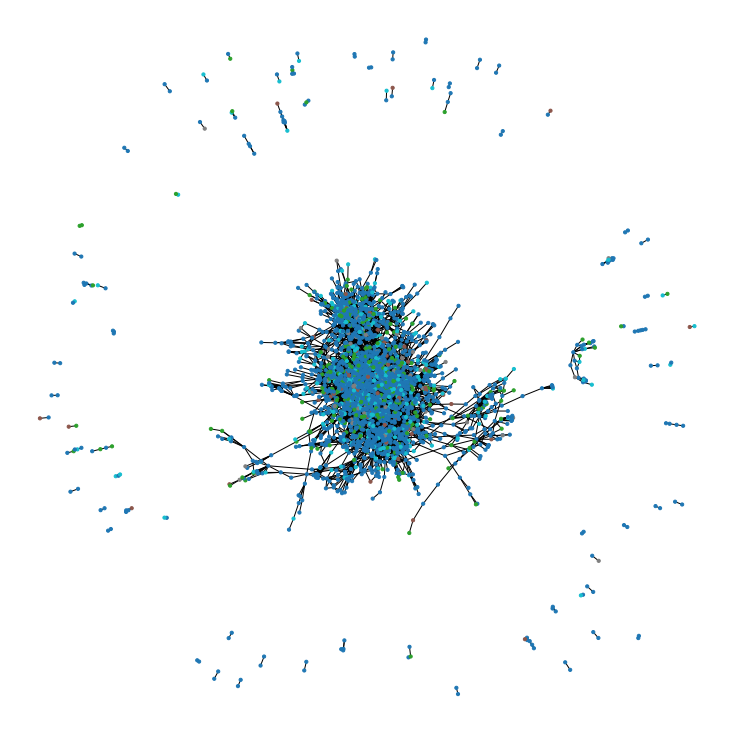

In [9]:
model = GraphSage(A, X, y, agg_func='MAX', len_walk=3, num_neigh=10)
model = GraphSage(A, X, y, agg_func='MEAN', len_walk=3, num_neigh=10)
acc = model.train_epoch(epochs=50, lr=1e-3)

model.draw_cora()
#acc['acc']

Train length :1896, Validation length :812
Epoch: 0
training loss 15.7984
Validtion: Average loss: 1.8809, Accuracy: 21.1823%
Epoch: 1
training loss 15.6835
Validtion: Average loss: 1.7801, Accuracy: 38.4236%
Epoch: 2
training loss 15.5766
Validtion: Average loss: 1.6860, Accuracy: 48.0296%
Epoch: 3
training loss 15.4764
Validtion: Average loss: 1.5979, Accuracy: 50.0000%
Epoch: 4
training loss 15.3818
Validtion: Average loss: 1.5149, Accuracy: 51.6010%
Epoch: 5
training loss 15.2921
Validtion: Average loss: 1.4361, Accuracy: 53.4483%
Epoch: 6
training loss 15.2064
Validtion: Average loss: 1.3600, Accuracy: 55.1724%
Epoch: 7
training loss 15.1235
Validtion: Average loss: 1.2858, Accuracy: 58.9901%
Epoch: 8
training loss 15.0426
Validtion: Average loss: 1.2130, Accuracy: 61.8227%
Epoch: 9
training loss 14.9633
Validtion: Average loss: 1.1413, Accuracy: 64.9015%
Epoch: 10
training loss 14.8853
Validtion: Average loss: 1.0714, Accuracy: 68.5961%
Epoch: 11
training loss 14.8094
Validtion: 

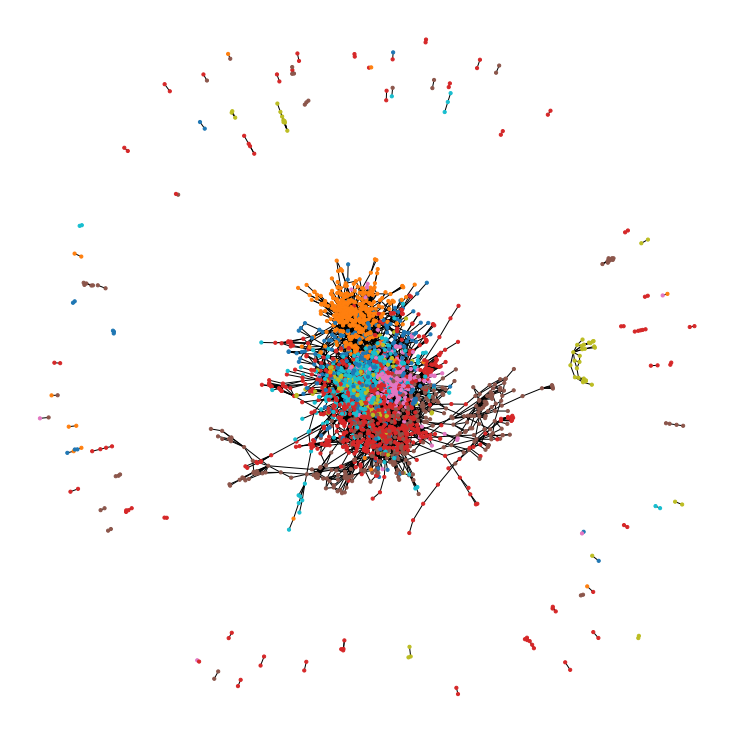

In [12]:
model = LPA_GCN(A, X, y, lamb=10, hid=200)
acc = model.train_model(epochs=50, lr=1e-3)
model.draw_cora()
acc['acc']

In [ ]:
model = n_hidden_GCN(A, X, y, hidden_neurons=200, F=128, class_number=len(set(y)))
model.train_epoch(epochs=1, lr=1e-3)
model.draw_cora()

Train length :5927, Validation length :2540
Epoch: 0
training loss 3.6968
Validtion: Average loss: 0.0000, Accuracy: 3.6614%
